In [1]:
import os
os.getcwd()

'/Users/JJKaufman/DESS/IFT6759/Lyrics2Melody'

In [2]:
file_path_SW = './data/lmd_full_MIDI_dataset/Sentence_and_Word_Parsing'
file_path_S = './data/lmd_full_MIDI_dataset/Sentence_Parsing'
file_path_Syll = './data/lmd_full_MIDI_dataset/Syllable_Parsing'
file_path_W = './data/lmd_full_MIDI_dataset/Word_Parsing'
file_path_songID = './data/lmd_full_MIDI_dataset/listSongID.txt'
file_path_songID_JSON = './data/lmd_full_MIDI_dataset/listSongJSON.json'


In [3]:
import pandas as pd

In [4]:
import numpy as np
import json

In [5]:

with open(file_path_songID_JSON, 'r') as f:
    songID = json.load(f)



In [6]:
Sentence_Word={'duration':[], 'midi_note': [], 'sentence_word':[], 'sentence_syllable':[]}
for filename in os.listdir(file_path_SW):
    if filename.endswith(".npy"):
        # Load the .npy file using numpy.load()
        filepath = os.path.join(file_path_SW, filename)
        loaded = np.load(filepath, allow_pickle = True)
        Sentence_Word['duration'] = loaded[0, 0]
        Sentence_Word['midi_note'] = loaded[0,1]
        Sentence_Word['sentence_word'] = loaded[0,2]
        Sentence_Word['sentence_syllable'] = loaded[0,3]
      
        

In [7]:
Sentences = {'duration': [], 'midi_note': [], 'sentence': []}
for filename in os.listdir(file_path_S):
    if filename.endswith(".npy"):
        # Load the .npy file using numpy.load()
        filepath = os.path.join(file_path_S, filename)
        loaded = np.load(filepath, allow_pickle = True)
        
        Sentences['duration'] = loaded[0, 0]
        Sentences['midi_note']= loaded[0,1]
        Sentences['sentence'] = loaded[0,2]
  

In [8]:
Words = {'duration': [], 'midi_note': [], 'word': [], 'syllable':[]}
for filename in os.listdir(file_path_W):
    if filename.endswith(".npy"):
        # Load the .npy file using numpy.load()
        filepath = os.path.join(file_path_W, filename)
        loaded = np.load(filepath, allow_pickle = True)
        Words['duration'] = loaded[0, 0]
        Words['midi_note']= loaded[0,1]
        Words['word'] = loaded[0,2]
        Words['syllable'] = loaded[0,3]
  

In [9]:
Sylls = {'duration': [], 'midi_note':[], 'syllable': []}
for filename in os.listdir(file_path_Syll):
    if filename.endswith(".npy"):
        # Load the .npy file using numpy.load()
        filepath = os.path.join(file_path_Syll, filename)
        loaded = np.load(filepath, allow_pickle = True)
        Sylls['duration'] = loaded[0, 0]
        Sylls['midi_note']= loaded[0,1]
        Sylls['syllable'] = loaded[0,2]
  


In [10]:
import re

In [11]:
songs = {}
#loading the song ids and midi files from the txt file
with open(file_path_songID, "r") as file:
    # Iterate over each line in the file
    for line in file:
        # Skip empty lines
        if not line.strip():
            continue
        
        # Use regular expression to split the line into 'ID' and 'song_name' components
        match = re.match(r'(\S+)\s+(.*)', line.strip())
        if match:
            ID, midi = match.groups()
            # Store the data in the dictionary
            songs[ID] = midi
        else:
            print(f"Issue with line: {line}")
    

In [12]:
df_sentence_word = pd.DataFrame(Sentence_Word)
df_sentence = pd.DataFrame(Sentences)
df_word = pd.DataFrame(Words)
df_syllable = pd.DataFrame(Sylls)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


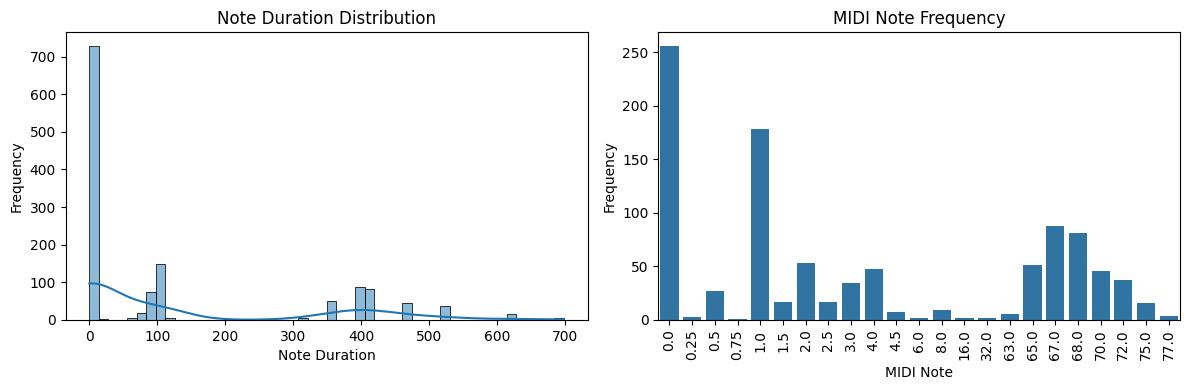

In [14]:
plt.figure(figsize=(12, 4))
flat_durations = [item for sublist in df_syllable['duration'] for item in sublist]

# Plot histogram for note duration
plt.subplot(1, 2, 1)
sns.histplot(flat_durations, bins=50, kde=True)
plt.title('Note Duration Distribution')
plt.xlabel('Note Duration')
plt.ylabel('Frequency')

flat_midis = [item for sublist in df_syllable['midi_note'] for item in sublist]

# Plot bar chart for MIDI note frequency
plt.subplot(1, 2, 2)
sns.barplot(x=pd.Series(flat_midis).value_counts().index, y=pd.Series(flat_midis).value_counts().values)
plt.title('MIDI Note Frequency')
plt.xlabel('MIDI Note')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

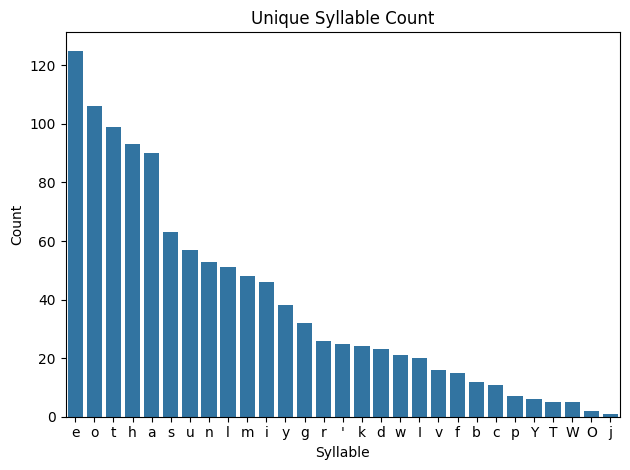

In [15]:
flat_syllables = [item for sublist in df_syllable['syllable'] for item in sublist]

# Plot bar chart for linguistic content count
sns.barplot(x=pd.Series(flat_syllables).value_counts().index, y=pd.Series(flat_syllables).value_counts().values)
plt.title('Unique Syllable Count')
plt.xlabel('Syllable')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

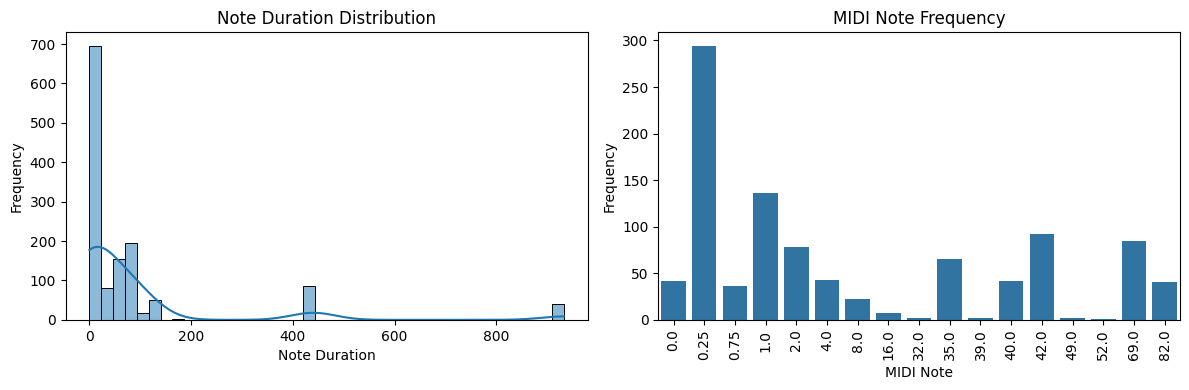

In [16]:
plt.figure(figsize=(12, 4))
durations = [item for sublist in df_sentence['duration'] for item in sublist]
flat_durations = [item for sublist in durations for item in sublist]

# Plot histogram for note duration
plt.subplot(1, 2, 1)
sns.histplot(flat_durations, bins=40, kde=True)
plt.title('Note Duration Distribution')
plt.xlabel('Note Duration')
plt.ylabel('Frequency')

f_midis = [item for sublist in df_sentence['midi_note'] for item in sublist]
flat_midis = [item for sublist in f_midis for item in sublist]

# Plot bar chart for MIDI note frequency
plt.subplot(1, 2, 2)
sns.barplot(x=pd.Series(flat_midis).value_counts().index, y=pd.Series(flat_midis).value_counts().values)
plt.title('MIDI Note Frequency')
plt.xlabel('MIDI Note')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

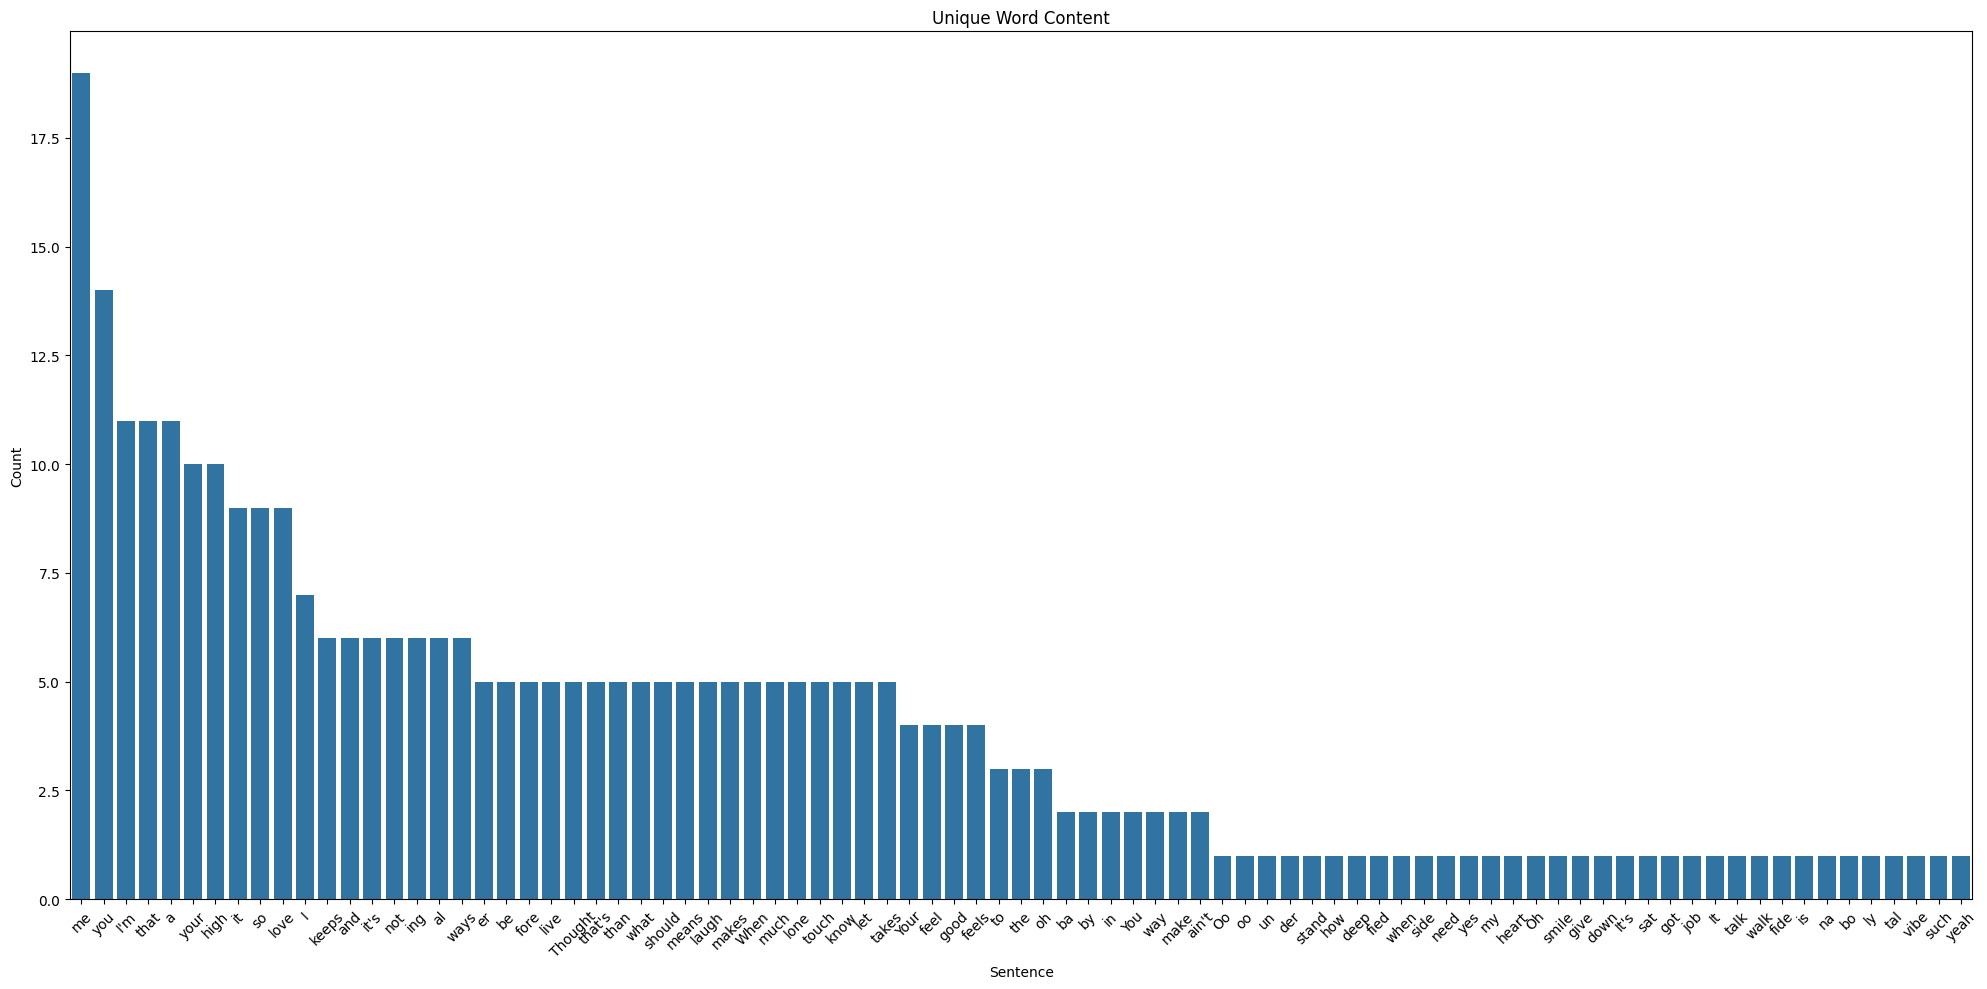

In [17]:
plt.figure(figsize=(20, 10))

flat_syllables = [item for sublist in df_sentence['sentence'] for item in sublist]

# Plot bar chart for linguistic content count
sns.barplot(x=pd.Series(flat_syllables).value_counts().index, y=pd.Series(flat_syllables).value_counts().values)
plt.title('Unique Word Content')
plt.ylabel('Count')
plt.xlabel('Sentence')

plt.xticks(rotation=45)  # Rotate x-axis labels by 90 degrees

plt.tight_layout()
plt.show()

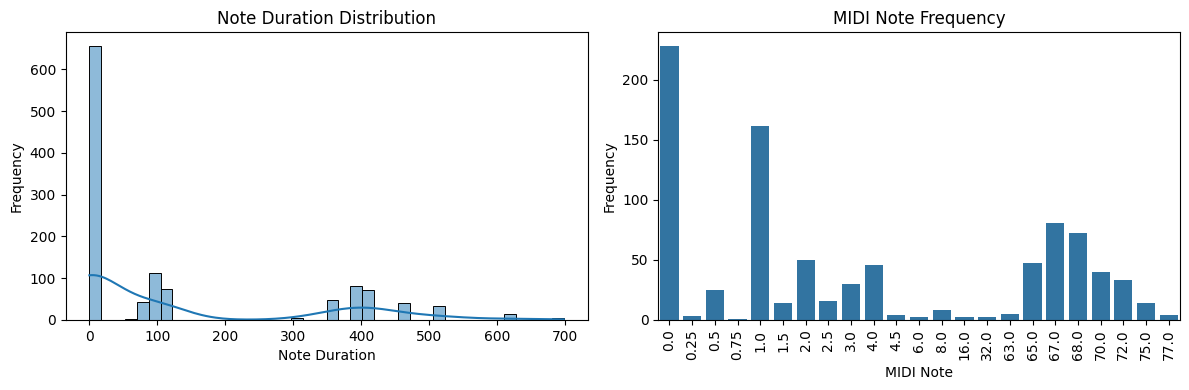

In [18]:
plt.figure(figsize=(12, 4))
durations = [item for sublist in df_word['duration'] for item in sublist]
flat_durations = [item for sublist in durations for item in sublist]

# Plot histogram for note duration
plt.subplot(1, 2, 1)
sns.histplot(flat_durations, bins=40, kde=True)
plt.title('Note Duration Distribution')
plt.xlabel('Note Duration')
plt.ylabel('Frequency')

f_midis = [item for sublist in df_word['midi_note'] for item in sublist]
flat_midis = [item for sublist in f_midis for item in sublist]

# Plot bar chart for MIDI note frequency
plt.subplot(1, 2, 2)
sns.barplot(x=pd.Series(flat_midis).value_counts().index, y=pd.Series(flat_midis).value_counts().values)
plt.title('MIDI Note Frequency')
plt.xlabel('MIDI Note')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

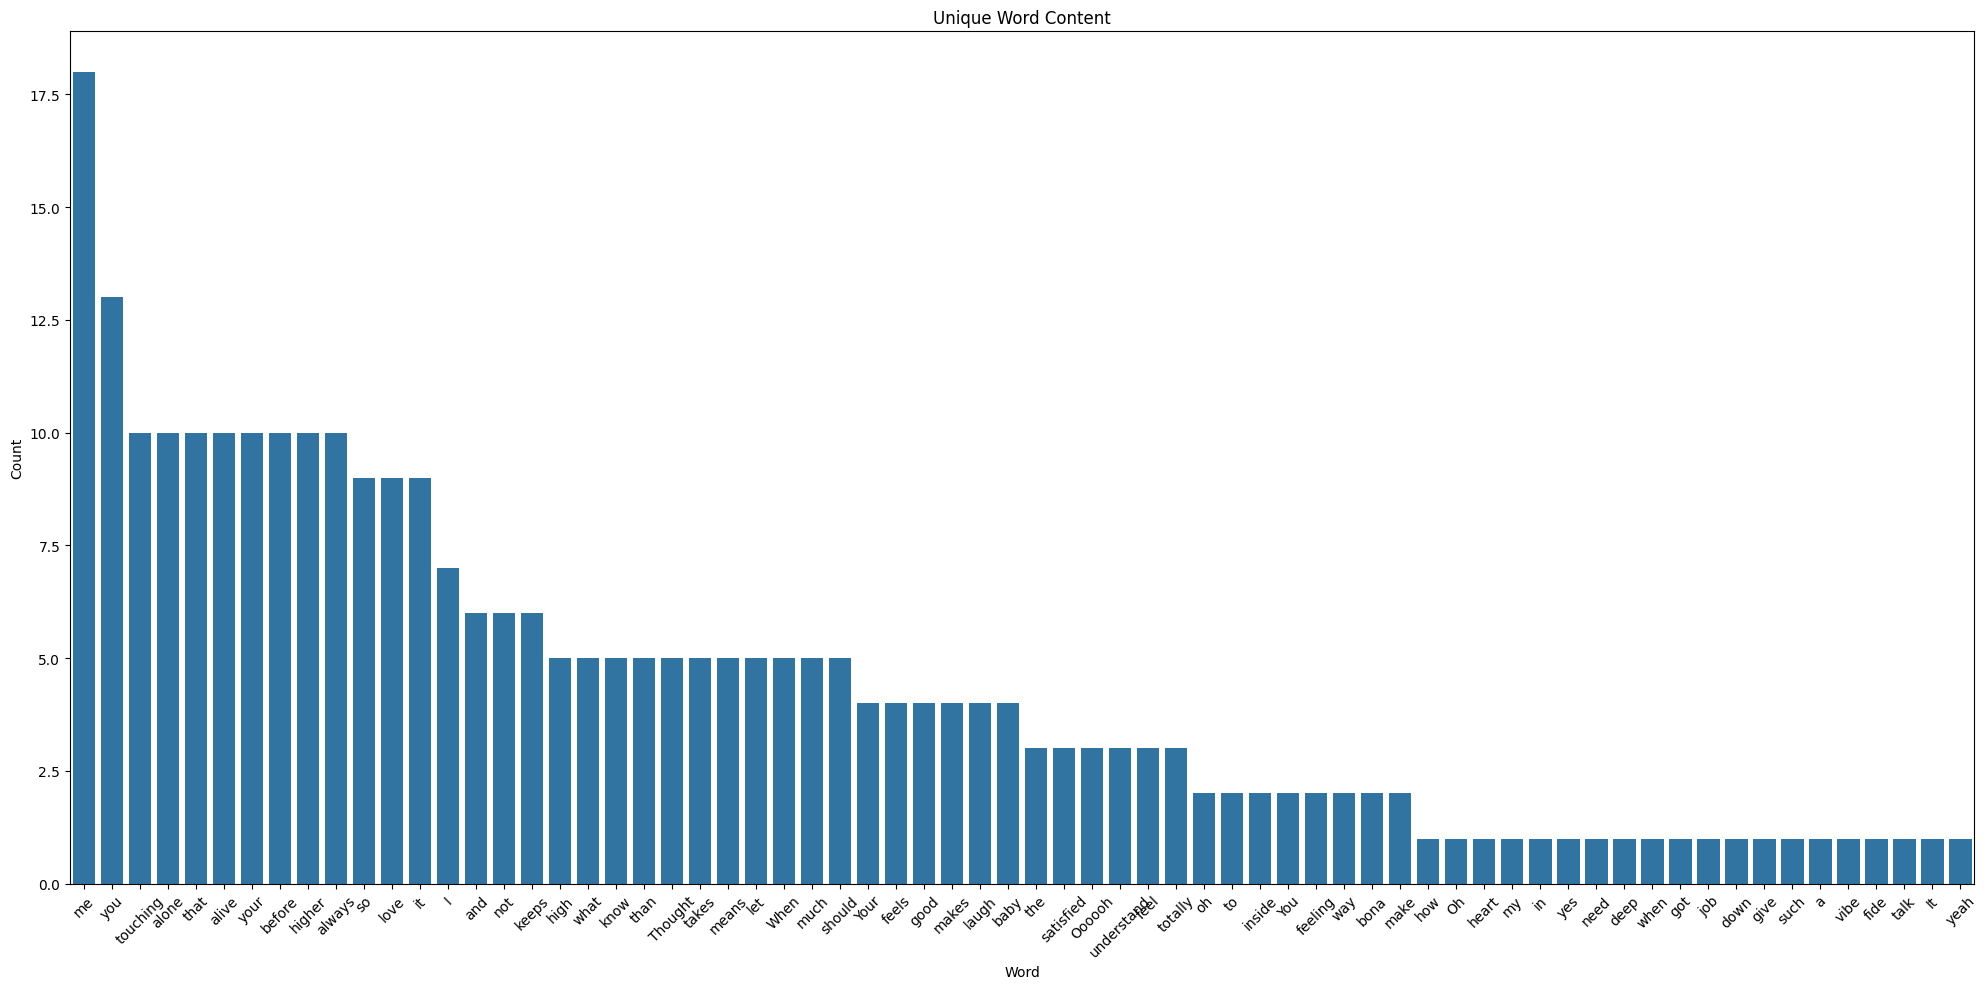

In [19]:
plt.figure(figsize=(20, 10))

flat_words = [item for sublist in df_word['word'] for item in sublist]

# Plot bar chart for linguistic content count
sns.barplot(x=pd.Series(flat_words).value_counts().index, y=pd.Series(flat_words).value_counts().values)
plt.title('Unique Word Content')
plt.ylabel('Count')
plt.xlabel('Word')

plt.xticks(rotation=45)  # Rotate x-axis labels by 90 degrees

plt.tight_layout()
plt.show()

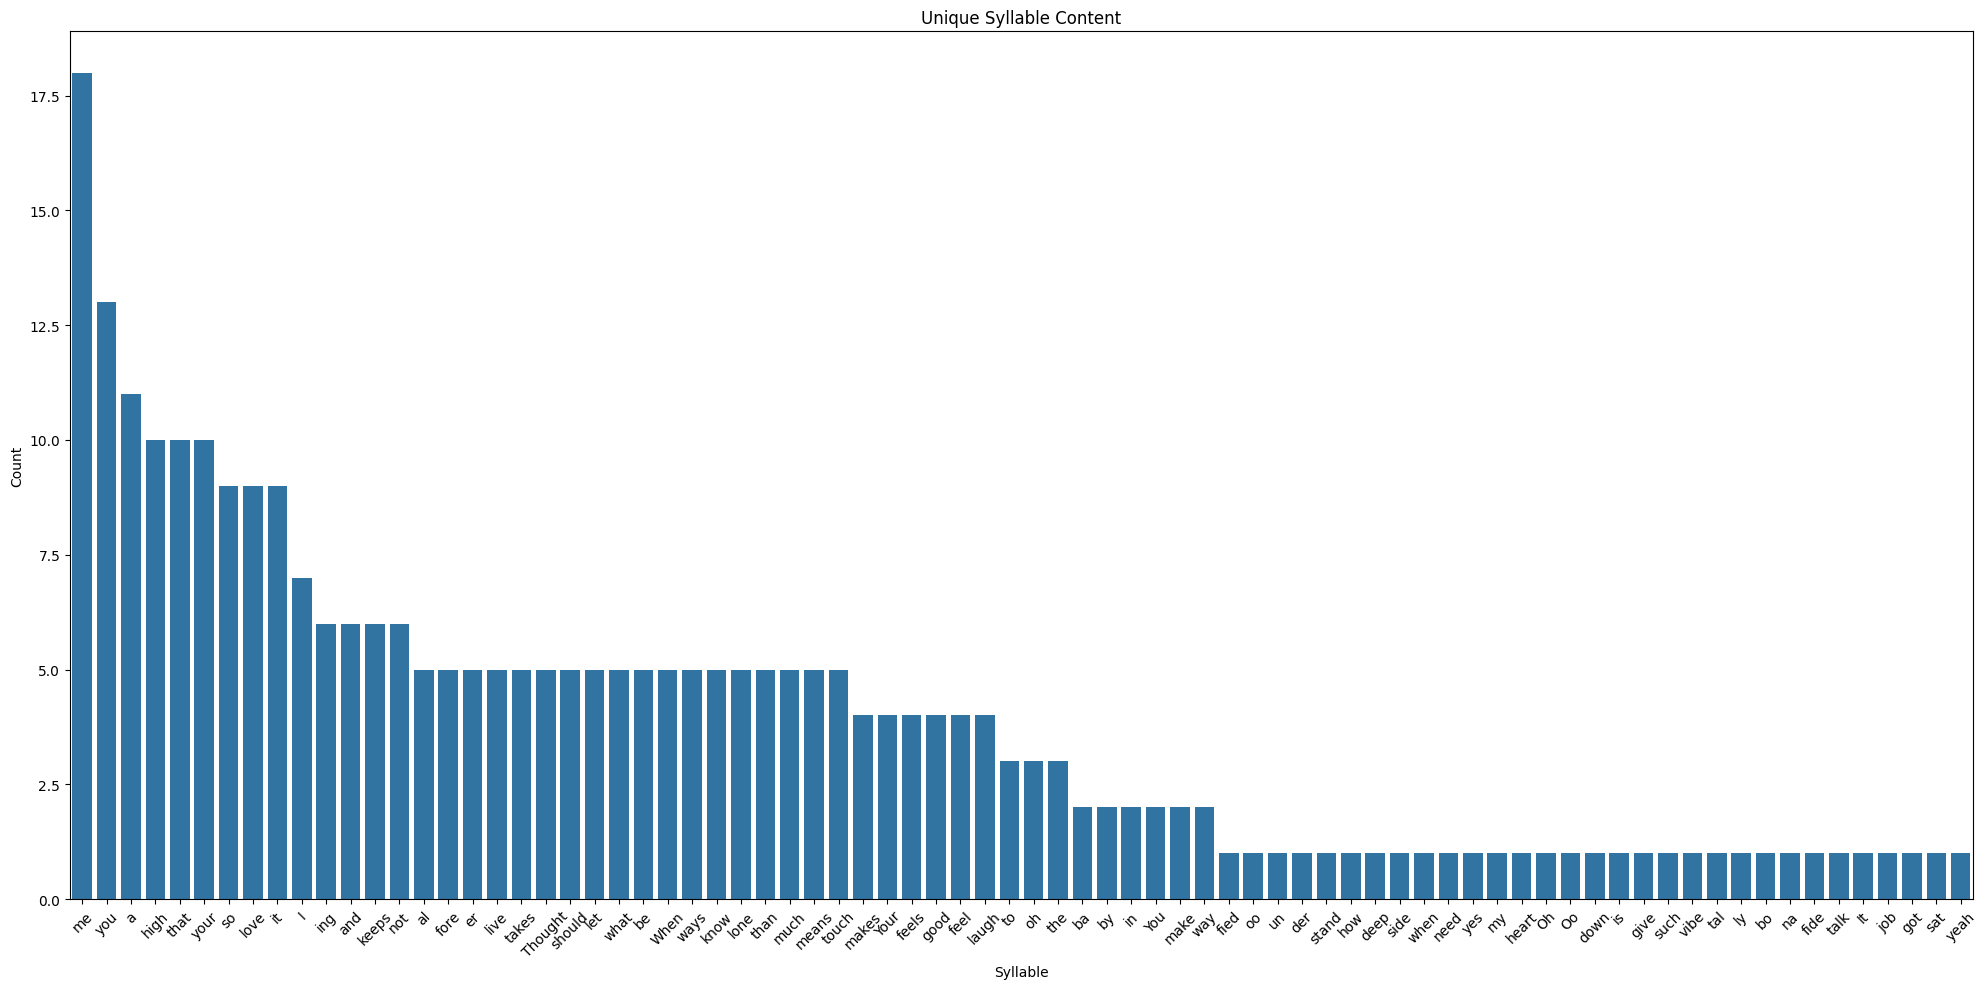

In [20]:
plt.figure(figsize=(20, 10))

flat_syllables = [item for sublist in df_word['syllable'] for item in sublist]

# Plot bar chart for linguistic content count
sns.barplot(x=pd.Series(flat_syllables).value_counts().index, y=pd.Series(flat_syllables).value_counts().values)
plt.title('Unique Syllable Content')
plt.ylabel('Count')
plt.xlabel('Syllable')

plt.xticks(rotation=45)  # Rotate x-axis labels by 90 degrees

plt.tight_layout()
plt.show()

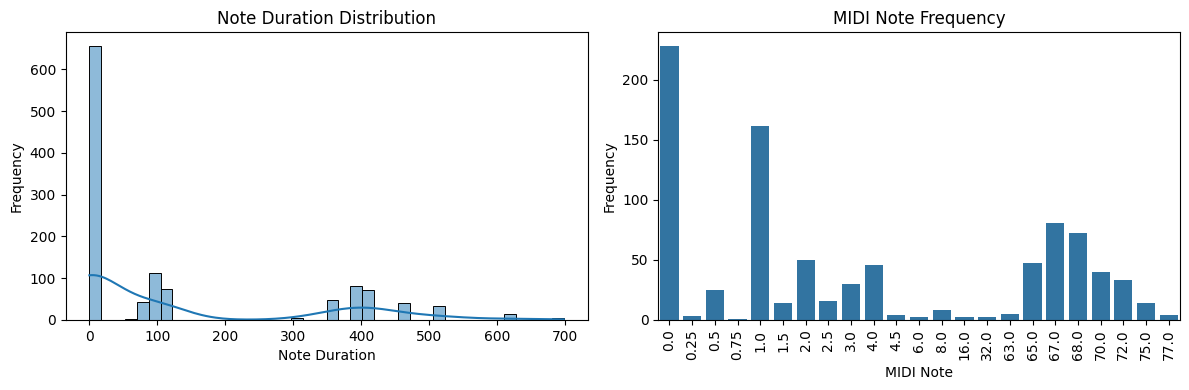

In [21]:
plt.figure(figsize=(12, 4))
durations = [item for sublist in df_sentence_word['duration'] for item in sublist]
flat_durations = [item for sublist in durations for item in sublist]
flat_durations2 = [item for sublist in flat_durations for item in sublist]

# Plot histogram for note duration
plt.subplot(1, 2, 1)
sns.histplot(flat_durations2, bins=40, kde=True)
plt.title('Note Duration Distribution')
plt.xlabel('Note Duration')
plt.ylabel('Frequency')

f_midis = [item for sublist in df_sentence_word['midi_note'] for item in sublist]
flat_midis = [item for sublist in f_midis for item in sublist]
flat_midis2 = [item for sublist in flat_midis for item in sublist]

# Plot bar chart for MIDI note frequency
plt.subplot(1, 2, 2)
sns.barplot(x=pd.Series(flat_midis2).value_counts().index, y=pd.Series(flat_midis2).value_counts().values)
plt.title('MIDI Note Frequency')
plt.xlabel('MIDI Note')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

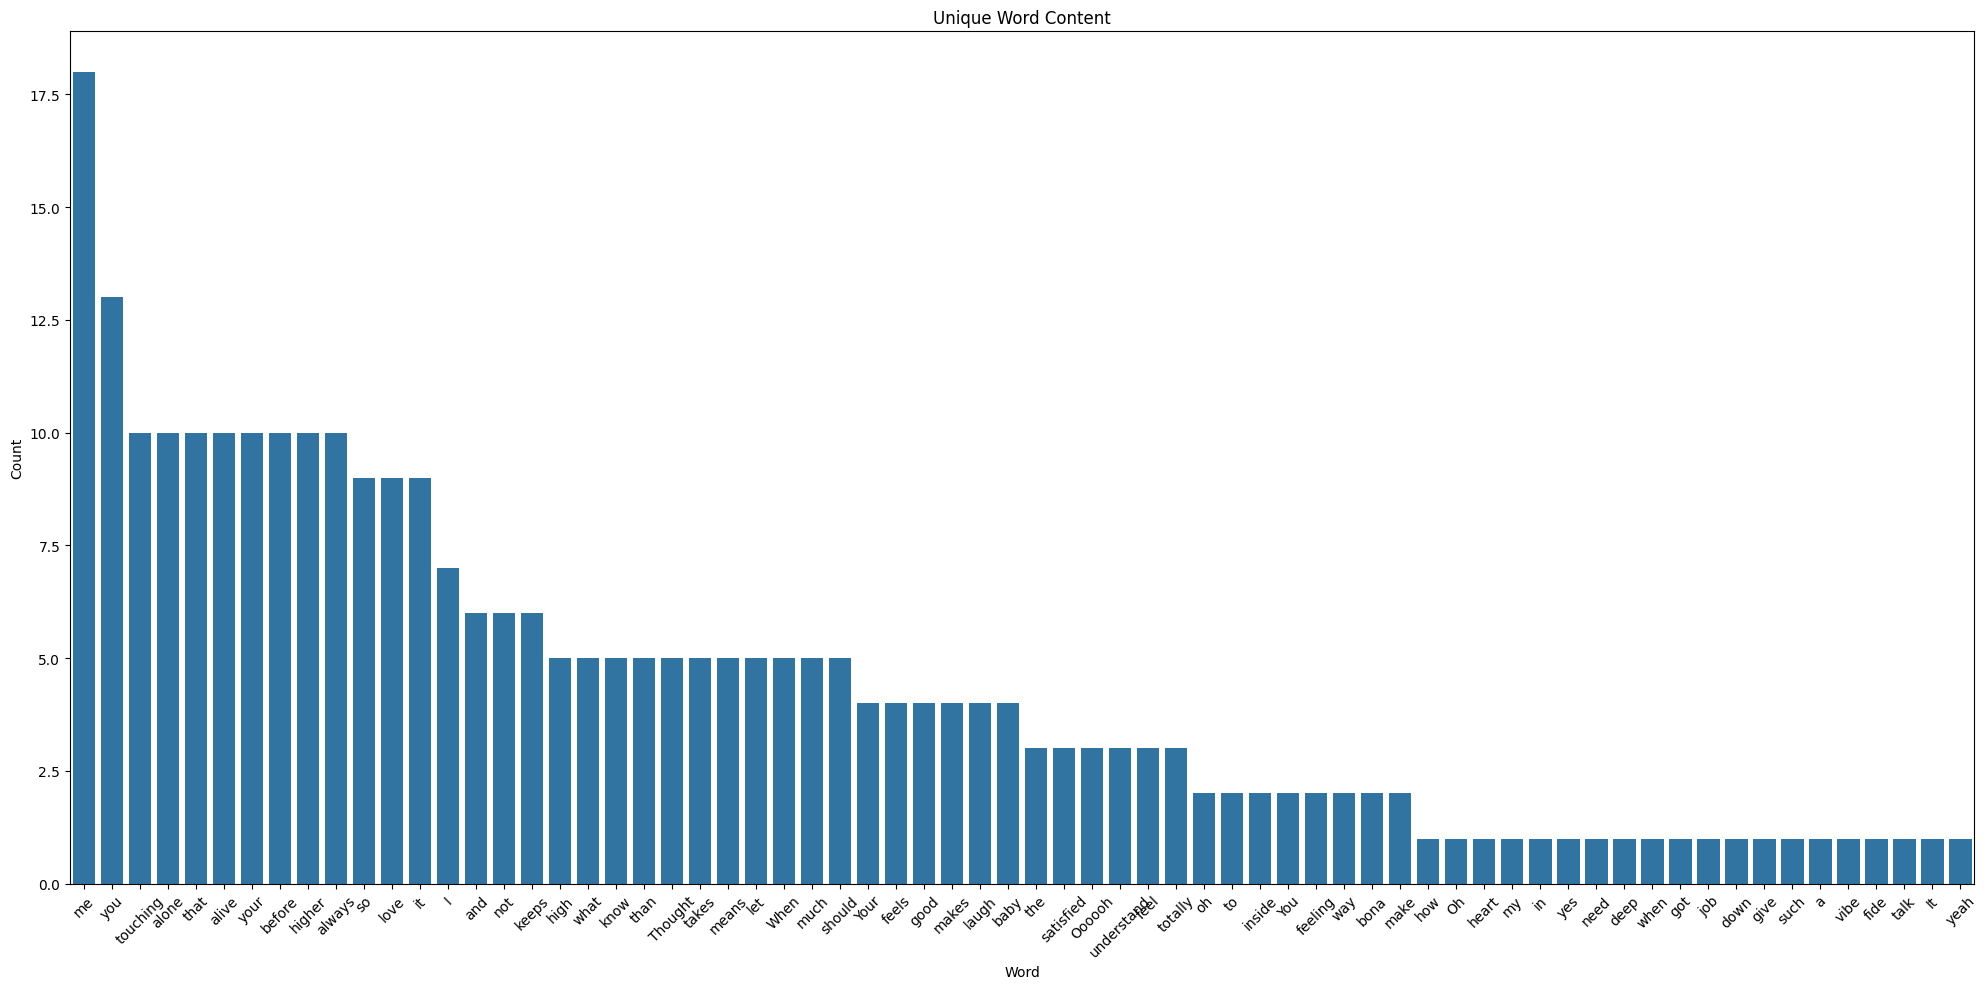

In [22]:
plt.figure(figsize=(20, 10)) #the word count in each sentence_word

flat_syllables = [item for sublist in df_sentence_word['sentence_word'] for item in sublist]
flat_syllables2 = [item for sublist in flat_syllables for item in sublist]

# Plot bar chart for linguistic content count
sns.barplot(x=pd.Series(flat_syllables2).value_counts().index, y=pd.Series(flat_syllables2).value_counts().values)
plt.title('Unique Word Content')
plt.ylabel('Count')
plt.xlabel('Word')

plt.xticks(rotation=45)  # Rotate x-axis labels by 90 degrees

plt.tight_layout()
plt.show()

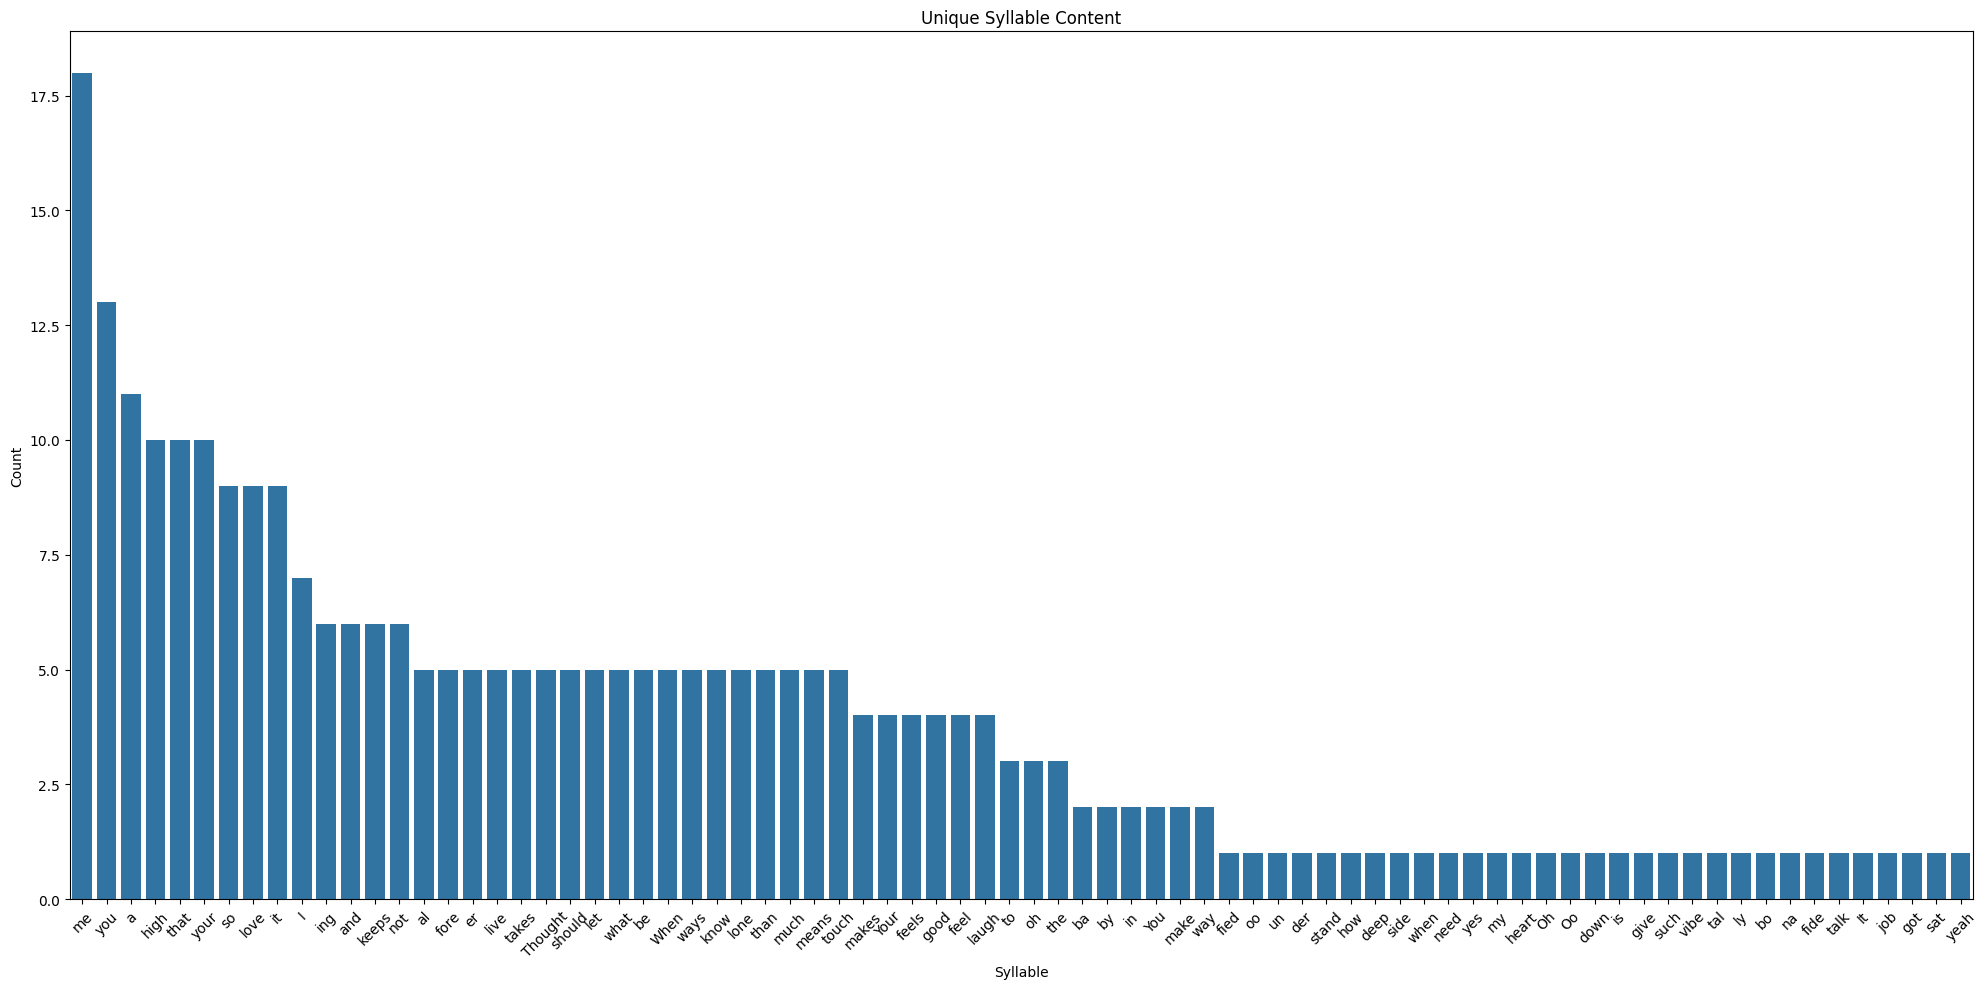

In [23]:
plt.figure(figsize=(20, 10))#this is for the syllables in each sentence word

flat_syllables = [item for sublist in df_sentence_word['sentence_syllable'] for item in sublist]
flat_syllables2 = [item for sublist in flat_syllables for item in sublist]

# Plot bar chart for linguistic content count
sns.barplot(x=pd.Series(flat_syllables2).value_counts().index, y=pd.Series(flat_syllables2).value_counts().values)
plt.title('Unique Syllable Content')
plt.ylabel('Count')
plt.xlabel('Syllable')

plt.xticks(rotation=45)  # Rotate x-axis labels by 90 degrees

plt.tight_layout()
plt.show()

In [24]:
df_sentence_word['sentence_length'] = df_sentence_word['sentence_word'].apply(lambda x: len(x))


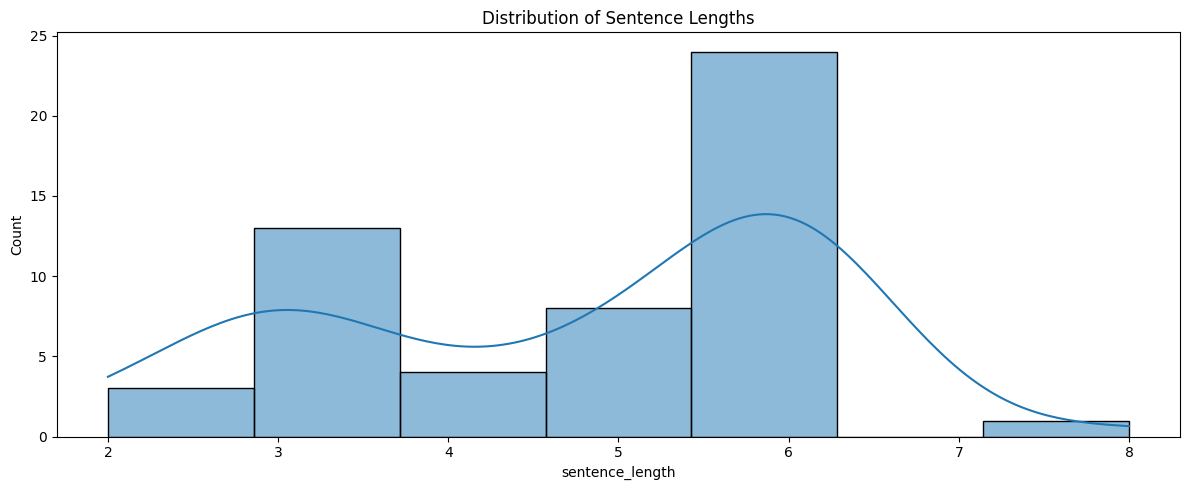

In [25]:
# 2. Calculate Linguistic Content Lengths
# For example, if your linguistic content is in syllables, you can calculate syllable lengths
df_sentence_word['sentence_length'] = df_sentence_word['sentence_word'].apply(lambda x: len(x))

# 3. Exploratory Data Analysis (EDA)
# Plot distributions of linguistic content lengths and note durations
plt.figure(figsize=(12, 5))
sns.histplot(df_sentence_word['sentence_length'], kde=True)
plt.title('Distribution of Sentence Lengths')


plt.tight_layout()
plt.show()


In [26]:
df_sentence_word_reset = df_sentence_word.reset_index(drop=True)

# Explode the 'duration' column
df_sentence_word_expanded = df_sentence_word_reset.explode('duration')

# Duplicate 'sentence_length' for each 'duration'
df_sentence_word_expanded['sentence_length'] = df_sentence_word_expanded.groupby(level=0).cumcount().map(df_sentence_word_reset['sentence_length'])

# Flatten the 'duration' column
df_flattened = df_sentence_word_expanded.explode('duration')
df_flattened = df_flattened.reset_index(drop=True)
df_flattened = df_flattened.explode('duration')
# df_flattened = df_flattened.reset_index(drop=True)




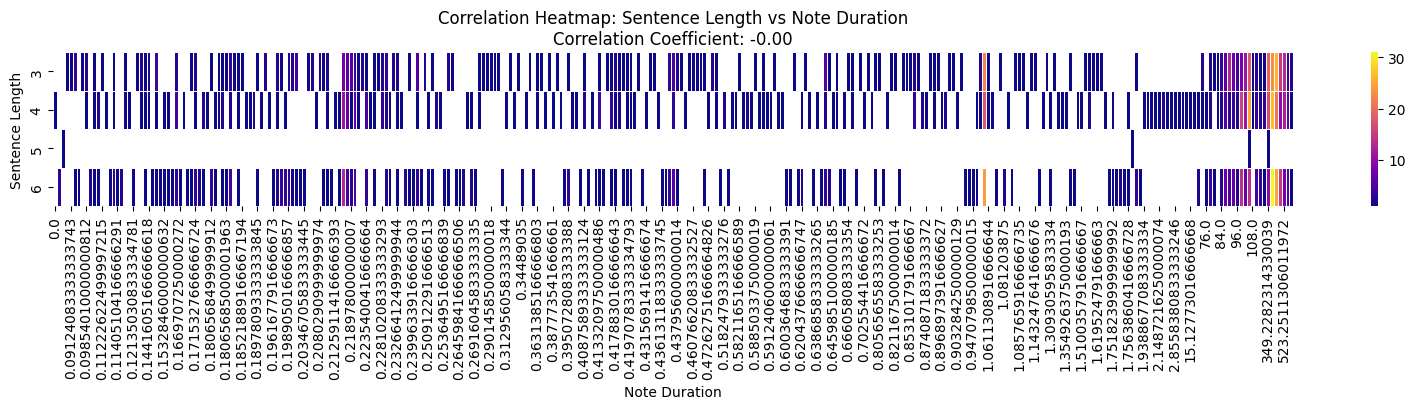

In [27]:
correlation = df_flattened['sentence_length'].corr(df_flattened['duration'])

# Create a pivot table with sentence length and duration
pivot_table = df_flattened.pivot_table(index='sentence_length', columns='duration', aggfunc='size')

# Create the heatmap
plt.figure(figsize=(20, 2))
sns.heatmap(pivot_table, cmap='plasma', annot=False, fmt='g', linewidths=.5)
plt.title('Correlation Heatmap: Sentence Length vs Note Duration\nCorrelation Coefficient: {:.2f}'.format(correlation))
plt.xlabel('Note Duration')
plt.ylabel('Sentence Length')
plt.show()

In [28]:
df_sentence_word_reset = df_sentence_word.reset_index(drop=True)

# Explode the 'midi_note' column
df_sentence_word_expanded = df_sentence_word_reset.explode('midi_note')

# Duplicate 'sentence_length' for each 'duration'
df_sentence_word_expanded['sentence_length'] = df_sentence_word_expanded.groupby(level=0).cumcount().map(df_sentence_word_reset['sentence_length'])

# Flatten the 'duration' column
df_flattened = df_sentence_word_expanded.explode('midi_note')
df_flattened = df_flattened.reset_index(drop=True)
df_flattened = df_flattened.explode('midi_note')
# df_flattened = df_flattened.reset_index(drop=True)



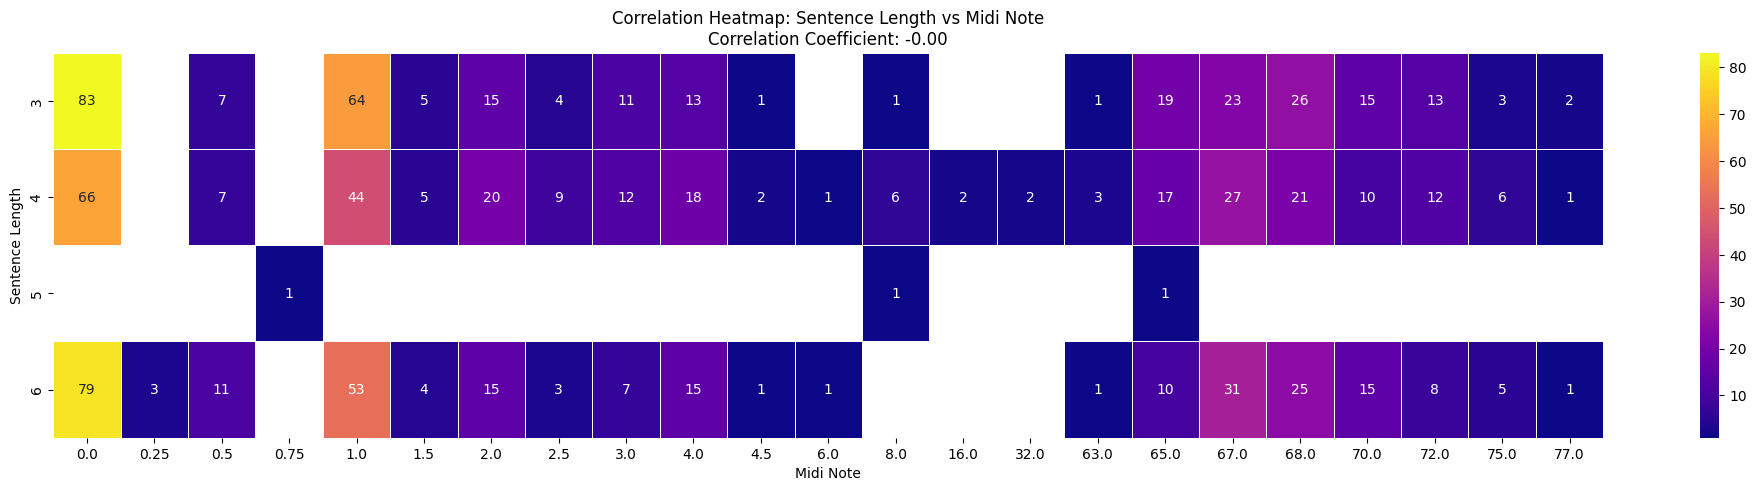

In [29]:
correlation2 = df_flattened['sentence_length'].corr(df_flattened['midi_note'])

# Create a pivot table with sentence length and duration
pivot_table2 = df_flattened.pivot_table(index='sentence_length', columns='midi_note', aggfunc='size')

# Create the heatmap
plt.figure(figsize=(25, 5))
sns.heatmap(pivot_table2, cmap='plasma', annot=True, fmt='g', linewidths=.5)
plt.title('Correlation Heatmap: Sentence Length vs Midi Note\nCorrelation Coefficient: {:.2f}'.format(correlation))
plt.xlabel('Midi Note')
plt.ylabel('Sentence Length')
plt.show()

In [30]:
df_sentence_word

,duration,midi_note,sentence_word,sentence_syllable,sentence_length
0,"[[[0.0, 0.4315691416666674, 349.2282314330039,...","[[[65.0, 2.0, 0.0]], [[65.0, 1.0, 0.0], [65.0,...","[[You], [always, always], [make], [me]]","[[You], [al, ways], [make], [me]]",4
1,"[[[2.180655916666666, 0.5501822250000004, 349....","[[[65.0, 2.5, 4.0]], [[67.0, 1.0, 0.0], [65.0,...","[[when], [feeling, feeling], [down]]","[[when], [feel, ing], [down]]",3
2,"[[[2.1669697916666664, 0.42244505833333257, 34...","[[[65.0, 2.0, 4.0]], [[65.0, 1.0, 0.0]], [[65....","[[You], [give], [me], [such], [a], [vibe]]","[[You], [give], [me], [such], [a], [vibe]]",6
3,"[[[1.332116166666669, 0.18978093333333135, 466...","[[[70.0, 1.0, 0.0], [68.0, 1.0, 0.0], [70.0, 1...","[[totally, totally, totally], [bona, bona], [f...","[[to, tal, ly], [bo, na], [fide]]",3
4,"[[[3.6998157916666656, 0.1760948083333318, 349...","[[[65.0, 1.0, 0.0]], [[65.0, 1.0, 0.0]], [[67....","[[not], [the], [way], [you]]","[[not], [the], [way], [you]]",4
5,"[[[1.9388677083333334, 0.23083930833333355, 31...","[[[63.0, 1.0, 4.0]], [[65.0, 1.5, 0.0]], [[65....","[[and], [it], [the], [way], [you], [talk]]","[[and], [it], [the], [way], [you], [talk]]",6
6,"[[[2.1669697916666664, 0.3129560583333344, 349...","[[[65.0, 1.5, 4.0]], [[65.0, 1.0, 0.0]], [[68....","[[It], [the], [job], [you], [got]]","[[It], [the], [job], [you], [got]]",5
7,"[[[1.108576124999999, 0.13959847499999967, 466...","[[[70.0, 1.0, 0.0]], [[70.0, 1.0, 0.0]], [[68....","[[that], [keeps], [me], [satisfied, satisfied,...","[[that], [keeps], [me], [sat, is, fied]]",4
8,"[[[0.2235400416666664, 1.284670933333338, 523....","[[[72.0, 6.0, 0.0]], [[65.0, 2.0, 1.0]], [[68....","[[Your], [love], [it], [feels], [so], [good]]","[[Your], [love], [it], [feels], [so], [good]]",6
9,"[[[0.22810208333333293, 0.1487225583333327, 39...","[[[67.0, 1.0, 0.0]], [[67.0, 1.5, 0.0]], [[67....","[[and], [what], [takes], [me], [high]]","[[and], [what], [takes], [me], [high]]",5
